In [1]:
import sys
sys.path.insert(0 ,  '/home/arpit/study/ML/github')

In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#One way to train and evaluate the model is to split the data into train and test set.
#Train the model on the training set and see the general performance on the test set
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X , y = make_blobs(random_state = 0)
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 0 )
reg = LogisticRegression().fit(X_train , y_train)
print("Test accuracy : " , reg.score(X_test , y_test))

Test accuracy :  0.88


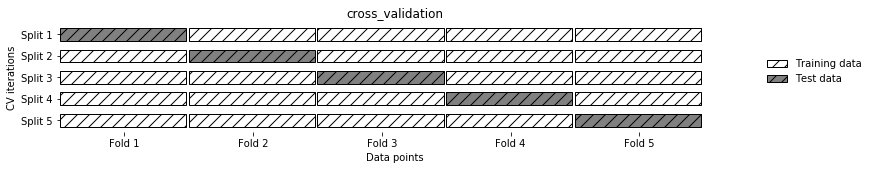

In [7]:
#now evaluating the model with the help of cross validation 
#now we are going to use k-fold cross validation
mglearn.plots.plot_cross_validation()
#this shows a way how the cross validation works
#cross validation is implemented in the scikit learn using cross_val_score from the model_selection module

In [11]:
#implementing cross validation on the iris dataset
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg , iris.data , iris.target)
print("The scores are : " , scores)

#note it shows the thress score 
#the deafault number of fold in k-fold cross validation is 3

The scores are :  [0.96078431 0.92156863 0.95833333]


In [19]:
#We can change the number of folds using the cv parameter
scores = cross_val_score(logreg , iris.data , iris.target , cv = 5)
print("The scores are : " , scores)
#there is high variance in the data
#this is varying from 1 to 0.9

The scores are :  [1.         0.96666667 0.93333333 0.9        1.        ]


In [20]:
#printing the average
print("Average score is : " , scores.mean())
#it may be noted that the cross validation is not the way to build the model
#this is used only for the evaluation purpose and tells how well the data generalizes to the new dataset

Average score is :  0.9600000000000002


In [22]:
#Stratified k-fold cross-validation
#let us have a look of the iris data set
print("Target value of the iris dataset is : " , iris.target)
#Since the simple k-fold is going to fail here 
#so the scikit is not going to use this for classification
#It is using the stratified k-fold cross-validation in which it is ensured that percent in train and test set is preserved


Target value of the iris dataset is :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


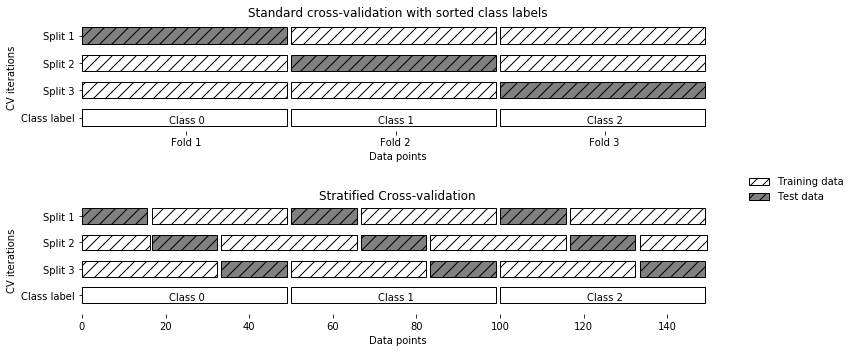

In [24]:
mglearn.plots.plot_stratified_cross_validation()
#this is the comparison for the standard and stratified cross validation

In [30]:
#for regression default is the standard cross validation
#But now we are going to use different cross validation techniques
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)

In [34]:
scores = cross_val_score(logreg , iris.data, iris.target ,cv = kfold)
print("Scores are : ", scores)
#this shows using standard cross validation on the iris data set is not a very goog idea

Scores are :  [1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [35]:
kfold = KFold (n_splits = 3)
scores = cross_val_score(logreg , iris.data , iris.target , cv = kfold)
print("Score are  : " , scores)

Score are  :  [0. 0. 0.]


In [37]:
#one way to resolve this problem is to shuffle the data
#this can be done by turning the shuffle parameter true
kfold = KFold (n_splits = 3 , shuffle = True , random_state = 0)
scores = cross_val_score(logreg , iris.data , iris.target , cv = kfold)
print("Score are  : " , scores)
#this time the results are much better

Score are  :  [0.9  0.96 0.96]


In [40]:
#leave-one-out is a better is another way where the size of each fold is only 1
#this is comutationally very expensive
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg , iris.data , iris.target , cv = loo)
print("Average score : " , scores.mean())
print("Number of iterations : " , len(scores))

Average score :  0.9533333333333334
Number of iterations :  150


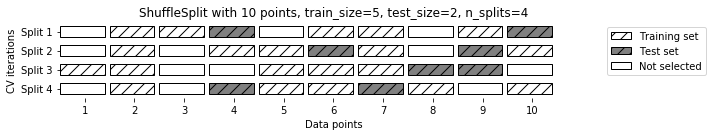

In [43]:
#shuffle-split cross validation
mglearn.plots.plot_shuffle_split()
#we can mention the train and test sizes with the help of the train-size and test-size 
#integet value means the absolute value
#float value means the fraction

In [45]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(train_size = 0.5 , test_size = 0.5 , n_splits = 10)   #this is for 10 iterations
scores = cross_val_score(logreg , iris.data , iris.target , cv = shuffle_split)
print("Cross validation score : \n"  , scores)
#it can be useful with the larger data sets


Cross validation score : 
 [0.85333333 0.93333333 0.96       0.96       0.90666667 0.90666667
 0.78666667 0.97333333 0.97333333 0.92      ]


In [49]:
#group kFold
#this is used when you do not want to split the group into train and test sizes
#A group will be wither in train set only or in the test set
#example with 12 points
from sklearn.model_selection import GroupKFold
X , y  = make_blobs(n_samples = 12 , random_state = 0)
groups = [0 , 0 , 0 , 1, 1, 1, 1, 2, 2, 3, 3, 3]
ko = GroupKFold (n_splits = 3)
scores = cross_val_score(logreg , X , y, groups , cv = ko)
print("Scores are : " , scores)

Scores are :  [0.75       0.8        0.66666667]


In [52]:
#the most commonly used are standard kfold , stratified kfold and grouokfold